<a href="https://colab.research.google.com/github/youngchanseo/Hon.Gong.Machine-SNU/blob/main/(02_2_3)_%EC%88%98%EC%83%81%ED%95%9C_%EB%8F%84%EB%AF%B8_%ED%95%9C%EB%A7%88%EB%A6%AC_p94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# http://bit.ly/bream_smelt

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,stratify=fish_target, random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(train_input, train_target)
#test set의 도미(1)와 빙어(0)를 올바르게 분류함:accuracy=1

1.0

In [6]:
print(kn.predict([[25,150]]))
#도미(1) 데이터([25,150]) 를 넣고 모델이 잘 맞는지 예측해봄
#빙어(0)가 나와서 예측 실패

[0.]


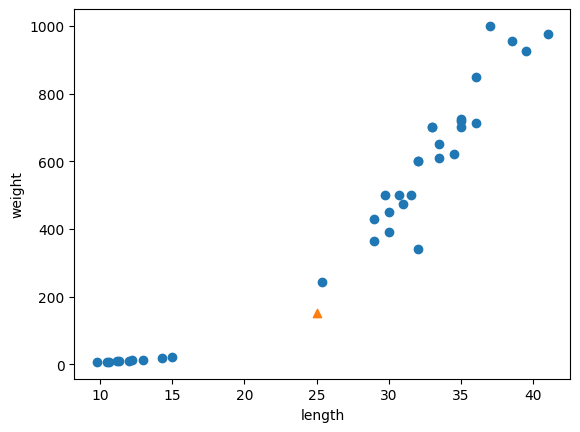

In [7]:
# 왜그런지 살펴보기위해 눈으로봄
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0],train_input[:, 1])
plt.scatter(25, 150, marker='^')#도미(1) 데이터([25,150]) 를 넣어봄 #marker는 매개변수 모양을 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

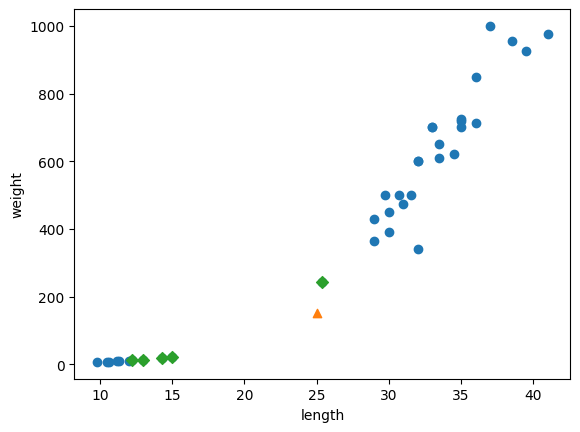

In [10]:
#KNeighborsClassifier()라는 class는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors() method를 제공함
#이 method는 이웃까지의 거리와, 이웃 샘플의 index를 반환함 N-neighbors의 기본값은 5라서, 5개의 이웃이 반환됨
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0],train_input[:, 1])
plt.scatter(25, 150, marker='^')#도미(1) 데이터([25,150]) 를 넣어봄 #marker는 매개변수 모양을 지정
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
#이웃이 도미(1)인지 빙어(0)인지 확인
print("train_input:", train_input[indexes])
print("train_target:", train_target[indexes])
# [길이 25cm, 무게 150g 생선]에서 가장 가까운 생선 4마리는 빙어(0)

train_input: [[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
train_target: [[1. 0. 0. 0. 0.]]


In [17]:
print(distances) #y scale과 x scale의 비율이 안맞은채로 distance가 계산됨

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


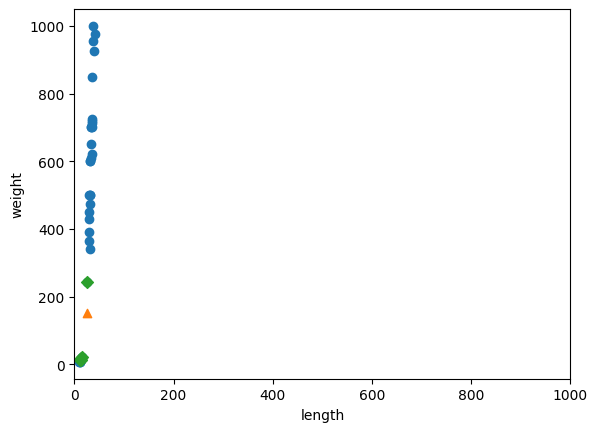

In [18]:
plt.scatter(train_input[:, 0],train_input[:, 1])
plt.scatter(25, 150, marker='^')#도미(1) 데이터([25,150]) 를 넣어봄 #marker는 매개변수 모양을 지정
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
# 표준 점수와 표준 편차

mean= np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)


[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [21]:
train_scaled = (train_input-mean) / std # broadcasting
print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]
